In [1]:
import pandas as pd

#matplotlib permet de faire de la visualisation de façon assez simple
#et s'intègre très bien dans les notebooks
import matplotlib.pyplot as plt

#l'affichage se fera par l'intermédiaire du notebook, il serait possible de le faire
#aussi avec gtk
%matplotlib inline

import seaborn as sns

In [7]:
coaches = pd.read_json("coaches.json")

In [5]:
# On jette un coup d'oeil sur les données
coaches.shape

(208, 9)

In [6]:
coaches.head(5)

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...","{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",0
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",0
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...","{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",0
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",674
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",0


In [7]:
list(coaches)

['wyId',
 'shortName',
 'firstName',
 'middleName',
 'lastName',
 'birthDate',
 'birthArea',
 'passportArea',
 'currentTeamId']

In [8]:
coaches.loc[147] # 147 est choisi au hasard

wyId                                                        275291
shortName                                               Rubén Uría
firstName                                               Juan Rubén
middleName                                                        
lastName                                               Uría Corral
birthDate                                               1968-01-30
birthArea        {'id': 724, 'alpha2code': 'ES', 'alpha3code': ...
passportArea     {'id': 724, 'alpha2code': 'ES', 'alpha3code': ...
currentTeamId                                                    0
Name: 147, dtype: object

In [9]:
# Calcul du nombre d'entraineurs à la retraite
retired = coaches[coaches['currentTeamId'] == 0]
nb_retired = retired["wyId"].size
nb_retired

107

In [10]:
# Calcul du nombre d'entraineurs en activité
active = coaches[coaches['currentTeamId'] != 0]
nb_active = active["wyId"].size
nb_active

101

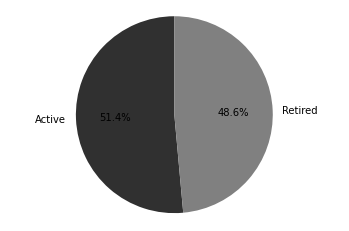

In [11]:
# Data to plot
labels = 'Active', 'Retired'
sizes = [nb_retired, nb_active]
colors = ['#303030', '#808080']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

In [12]:
# On peut trouver l'information sur le pays
# de naissance des entraineurs dans le dictionnaire
# de la colonne "birthArea". Il faut récupérer la 
# valeur de la clé "name"
coaches.loc[147]["birthArea"] # 147 est choisi au hasard

{'id': 724, 'alpha2code': 'ES', 'alpha3code': 'ESP', 'name': 'Spain'}

In [13]:
# Ne fonctionne pas : il faut créer une fonction pour 
# extraire le pays de chaque datapoint
coaches["birthArea"]["name"]

KeyError: 'name'

In [14]:
# Solution :
def extractCountry(dic):
    return dic["name"]

# Ajout d'une colonne dans le dataframe
coaches["country"] = coaches["birthArea"].apply(extractCountry)

In [15]:
coaches["country"]

0       Brazil
1      Germany
2        Italy
3        Spain
4      Germany
        ...   
203      Spain
204    Armenia
205     France
206      Spain
207      Spain
Name: country, Length: 208, dtype: object

In [16]:
# Nombre d'occurrences par pays
serie = coaches["country"].value_counts()

In [17]:
serie.head(5)

Spain      39
Italy      31
Germany    27
France     26
England    12
Name: country, dtype: int64

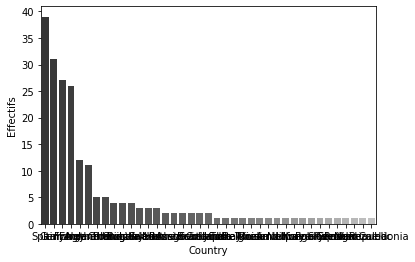

In [18]:
# Transformation de le série en dataframe
dfCountByCountry = pd.DataFrame({"Effectifs":serie,"Country":serie.index})

sns.barplot(x="Country",y="Effectifs",data=dfCountByCountry,palette="Greys_d")

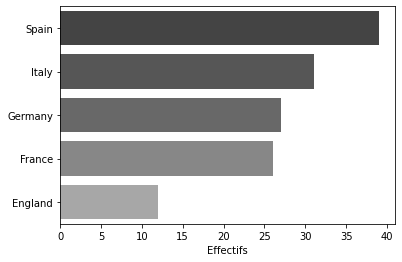

In [19]:
# Il y a trop de pays, le graphique est illisible.
# On ne garde que les 5 nationalités les plus représentées
serie = coaches["country"].value_counts().head(5)
dfCountByCountry = pd.DataFrame({"Effectifs":serie,"Country":serie.index})

sns.barplot(y="Country", x="Effectifs", data=dfCountByCountry, palette="Greys_d")
plt.ylabel('') # Suppression du label pour l'axe y
plt.show()


In [4]:
teams = pd.read_json("teams.json")

## Decouverte des donnees

In [31]:
teams.shape

(142, 6)

In [32]:
teams.head(5)

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [33]:
list(teams)

['city', 'name', 'wyId', 'officialName', 'area', 'type']

In [34]:
teams.loc[53]

city                                                       Milano
name                                               Internazionale
wyId                                                         3161
officialName                             FC Internazionale Milano
area            {'name': 'Italy', 'id': '380', 'alpha3code': '...
type                                                         club
Name: 53, dtype: object

In [35]:
teams.loc[53]["area"]

{'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'}

## Preparation des donnees pour construire le graphique

In [36]:
# Il n'y pas l'air d'y avoir beaucoup d'informations sur la Premier League dans 
# ce fichier, ni de coordonnées GPS. J'ai donc cherché sur Wikipedia 
# https://en.wikipedia.org/wiki/2020%E2%80%9321_Premier_League
# et pour les coordonnées GPS j'ai utilisé la recherche Google

teams["longitude"] = None # Nouvelles colonnes vides
teams["latitude"] = None

def addCoordinates(club,longitude,latitude):
    if club in teams["officialName"].values:
        teams.loc[teams['officialName'] == club, ['longitude']] = longitude
        teams.loc[teams['officialName'] == club, ['latitude']] = latitude
    elif club in teams["name"].values:
        teams.loc[teams['name'] == club, ['longitude']] = longitude
        teams.loc[teams['name'] == club, ['latitude']] = latitude
    else:
        print(club, "introuvable. Vérifiez l'orthographe.")

# Ajout des coordonnées des stades associés aux clubs de foot 
addCoordinates("Arsenal",51.5549,-0.1084)
addCoordinates("Aston Villa",52.5091,-1.8848)
addCoordinates("Brighton & Hove Albion",50.8616,-0.0837)
addCoordinates("Burnley",53.7887,-2.2303)
addCoordinates("Chelsea",51.4817,-0.1910)
addCoordinates("Crystal Palace",51.3980,-0.0861)
addCoordinates("Everton",53.4388,-2.9663)
addCoordinates("Fulham",51.4749,-0.2218)
addCoordinates("Leeds United",53.7778,-1.5721)
addCoordinates("Leicester City",52.6204,-1.1422)
addCoordinates("Liverpool",53.4308,-2.9608)
addCoordinates("Manchester City",53.4831,-2.2004)
addCoordinates("Manchester United",53.4631,-2.2913)
addCoordinates("Newcastle United",54.9756,-1.6217)
addCoordinates("Sheffield United",53.3700,-1.4699)
addCoordinates("Southampton",50.9058,-1.3910)
addCoordinates("Tottenham Hotspur",51.6043,-0.0664)
addCoordinates("West Bromwich Albion",52.5090,-1.9639)
addCoordinates("West Ham United",51.5387,-0.0166)
addCoordinates("Wolverhampton Wanderers",52.5902,-2.1304)


Aston Villa introuvable. Vérifiez l'orthographe.
Fulham introuvable. Vérifiez l'orthographe.
Leeds United introuvable. Vérifiez l'orthographe.
Sheffield United introuvable. Vérifiez l'orthographe.
Wolverhampton Wanderers introuvable. Vérifiez l'orthographe.


In [37]:
# Cinq clubs n'ont pas été trouvés dans le dataframe, sans doute
# parce qu'ils n'ont pas été écrits de la même façon.

# J'ai cherché les coordonnées GPS, le nom des clubs et des stades à la 
# main, je pensais que ça serait plus rapide que BeautifulSoup. Finalement
# je n'en suis pas si sûr.

# Vérification ajout des coordonnées
teams[teams["longitude"].notna() & teams["latitude"].notna()]

,city,name,wyId,officialName,area,type,longitude,latitude
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,54.9756,-1.6217
27,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,50.8616,-0.0837
39,"Burnley, Lancashire",Burnley,1646,Burnley FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,53.7887,-2.2303
54,Leicester,Leicester City,1631,Leicester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,52.6204,-1.1422
55,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,51.5387,-0.0166
65,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,53.4388,-2.9663
66,West Bromwich,West Bromwich Albion,1627,West Bromwich Albion FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,52.509,-1.9639
67,Manchester,Manchester City,1625,Manchester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,53.4831,-2.2004
68,London,Tottenham Hotspur,1624,Tottenham Hotspur FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,51.6043,-0.0664
70,London,Crystal Palace,1628,Crystal Palace FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,51.398,-0.0861


## Map

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


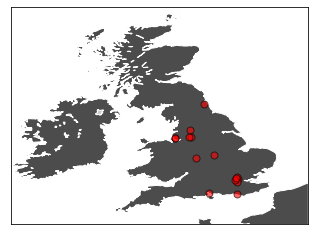

In [62]:
#def addPoints(longitude,latitude):
    #return longitude,latitude

#teams[teams["longitude"].notna() & teams["latitude"].notna()].apply(lambda x: addPoints(x.longitude, x.latitude), axis=1)

# libraries
# entrer la commande : <conda install basemap> dans la console
from mpl_toolkits.basemap import Basemap
import numpy as np
 
# Nouveau DataFrame pour les données ayant des coordonnées GPS
data = teams[teams["longitude"].notna() & teams["latitude"].notna()]
 
# Map
m=Basemap(llcrnrlon=-10.53, llcrnrlat=49.44,urcrnrlon=3.19,urcrnrlat=59.48,resolution = 'h')
m.fillcontinents(color='black', alpha=0.7)
m.drawcoastlines(color="white")
 
# Add a marker per city of the data frame!
m.plot(data['latitude'], data['longitude'], linestyle='none', marker="o", 
       markersize=7, alpha=0.6, c="red", markeredgecolor="black", markeredgewidth=1)

plt.show()



In [5]:
matches = pd.read_json("matches_England.json")

## Decouverte des donnees

In [29]:
matches.shape

(380, 14)

In [30]:
matches.head(5)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


In [31]:
list(matches)

['status',
 'roundId',
 'gameweek',
 'teamsData',
 'seasonId',
 'dateutc',
 'winner',
 'venue',
 'wyId',
 'label',
 'date',
 'referees',
 'duration',
 'competitionId']

In [32]:
matches.loc[183]

status                                                      Played
roundId                                                    4405654
gameweek                                                        20
teamsData        {'1633': {'scoreET': 0, 'coachId': 8235, 'side...
seasonId                                                    181150
dateutc                                        2017-12-26 15:00:00
winner                                                           0
venue                                             Vitality Stadium
wyId                                                       2499909
label                     AFC Bournemouth - West Ham United, 3 - 3
date                         December 26, 2017 at 4:00:00 PM GMT+1
referees         [{'refereeId': 385912, 'role': 'referee'}, {'r...
duration                                                   Regular
competitionId                                                  364
Name: 183, dtype: object

In [33]:
# Détail des informations dans la colonne teamsData :
# Dictionnaire comportant 2 clés (chaque id des équipes qui s'affrontent)
# A l'intérieur on peut trouver les 11 joueurs sur le terrain et les remplaçants
# L'information qui semble nous intéresser pour l'exercice est "score"
matches.loc[183]["teamsData"]

{'1633': {'scoreET': 0,
  'coachId': 8235,
  'side': 'away',
  'teamId': 1633,
  'score': 3,
  'scoreP': 0,
  'hasFormation': 1,
  'formation': {'bench': [{'playerId': 8301,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 399653,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 8553,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 26610,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 379209,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 7941,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 7970,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'}],
   'lineup': [{'playerId': 20620,
    

## Preparation des donnees pour construire le graphique

In [34]:
# Chargement des données teams.json pour trouver les id des equipes
teams = pd.read_json("teams.json")

def getIdTeam(nameTeam):
    return teams[teams["name"] == nameTeam]["wyId"].values[0] # recherche de l'id dans teams

# Fonction qui retourne le nombre de buts marqués par une équipe pendant un match
def extractScore(dic,idTeam):
    idTeam = str(idTeam)
    if idTeam not in dic:
        return None
    else:
        return dic[idTeam]["score"]
    
# Fonction qui retourne un DataFrame contenant les dates et le nombre de buts
# marqués par une équipe dont le nom est entré en paramètre
def newDataFrame(nameTeam):
    idTeam = getIdTeam(nameTeam)
    df = matches # Copie du df entier
    df["club"] = nameTeam # Pour savoir de quel club il s'agit
    df["score"] = df.apply(lambda x: extractScore(x['teamsData'], idTeam), axis=1) # appel extractScore(dic,idTeam)
    df = df[df["score"].notna()] # Suppression des matchs qui ne concernent pas l'equipe
    df = df.sort_values(by=['dateutc']) # Tri par date
    df = df.reset_index()
    return df.iloc[:, [16, 6, 15]]
    
    
# Creation des dataframes recensant les données des matchs d'une équipe + nombre de buts marqués cumulés
liverpool = newDataFrame("Liverpool")
city = newDataFrame("Manchester City")
united = newDataFrame("Manchester United")
chelsea = newDataFrame("Chelsea")
arsenal = newDataFrame("Arsenal")
tottenham = newDataFrame("Tottenham Hotspur")

# Concaténation des dataframes
big6 = pd.concat([liverpool, city, united, chelsea, arsenal, tottenham],ignore_index=True)

# Verification
big6

,score,dateutc,club
0,3.0,2017-08-12 11:30:00,Liverpool
1,1.0,2017-08-19 14:00:00,Liverpool
2,4.0,2017-08-27 15:00:00,Liverpool
3,0.0,2017-09-09 11:30:00,Liverpool
4,1.0,2017-09-16 14:00:00,Liverpool
...,...,...,...
223,1.0,2018-04-17 18:45:00,Tottenham Hotspur
224,2.0,2018-04-30 19:00:00,Tottenham Hotspur
225,0.0,2018-05-05 14:00:00,Tottenham Hotspur
226,1.0,2018-05-09 19:00:00,Tottenham Hotspur


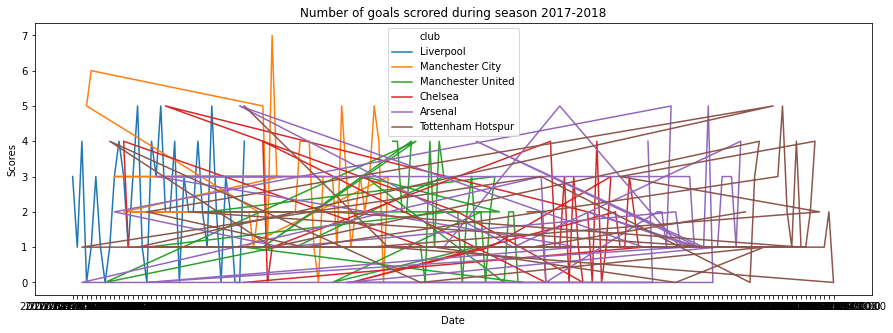

In [35]:
# On ne peut pas tirer grand chose du graphique ci-dessous. Il y a trop de dates différentes, alors 
# on va regrouper les scores des matchs par mois

plt.figure(figsize=(15,5)) # Taille du graph
ax = sns.lineplot(x = "dateutc", y = "score", data=big6, hue="club")
ax.set(xlabel='Date', ylabel='Scores', title='Number of goals scrored during season 2017-2018')
plt.show()

In [36]:
# Redéfinition de la fonction qui va cette fois regrouper les buts marqués par mois

def newDataFrame(nameTeam):
    idTeam = getIdTeam(nameTeam)
    df = matches # Copie du df entier
    df["club"] = nameTeam # Pour savoir de quel club il s'agit
    df["score"] = df.apply(lambda x: extractScore(x['teamsData'], idTeam), axis=1) # appel extractScore(dic,idTeam)
    df = df[df["score"].notna()] # Suppression des matchs qui ne concernent pas l'equipe
    df = df.sort_values(by=['dateutc']) # Tri par date
    df["yearMonth"] = df["dateutc"].str[:7] # Pour simplifier le graphique on retire les jours
    df = df.reset_index() # Redéfinition des index pour additionner facilement les scores
    df["index"] = df.index # Copie de l'index pour pouvoir s'en servir à la ligne suivante
    df["scoresPerMonth"] = df.apply(lambda x: scoresPerMonth(x['index'], df), axis=1) # Addition des scores
    return df.iloc[:, [15, 17, 18]].drop_duplicates()

def scoresPerMonth(index,dataframe):
    return dataframe[dataframe["yearMonth"] == dataframe.at[index,"yearMonth"]]["score"].sum()
    
    
# Creation des dataframes recensant les données des matchs d'une équipe + nombre de buts marqués cumulés
liverpool = newDataFrame("Liverpool")
city = newDataFrame("Manchester City")
united = newDataFrame("Manchester United")
chelsea = newDataFrame("Chelsea")
arsenal = newDataFrame("Arsenal")
tottenham = newDataFrame("Tottenham Hotspur")

# Concaténation des dataframes
big6 = pd.concat([liverpool, city, united, chelsea, arsenal, tottenham],ignore_index=True)

# Verification
big6.head(5)

,club,yearMonth,scoresPerMonth
0,Liverpool,2017-08,8.0
1,Liverpool,2017-09,4.0
2,Liverpool,2017-10,5.0
3,Liverpool,2017-11,11.0
4,Liverpool,2017-12,20.0


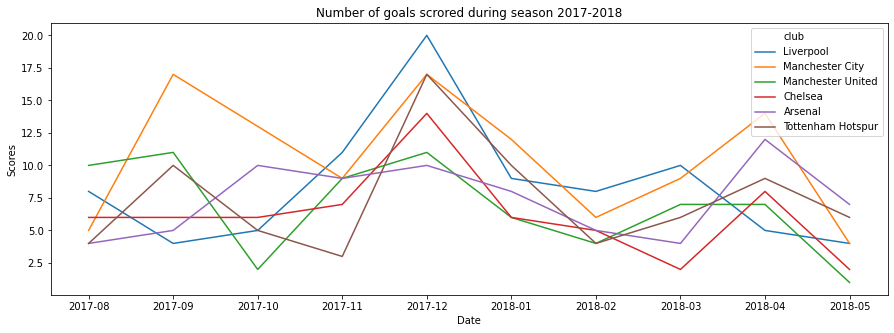

In [37]:
# Cette fois le graphique est bien plus lisible
plt.figure(figsize=(15,5)) # Taille du graph
ax = sns.lineplot(x = "yearMonth", y = "scoresPerMonth", data=big6, hue="club")
ax.set(xlabel='Date', ylabel='Scores', title='Number of goals scrored during season 2017-2018')
plt.show()

In [38]:
events = pd.read_json("events_England.json")

## Decouverte des donnees

In [39]:
events.head(5)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [40]:
events.shape

(643150, 12)

In [41]:
# On demande dans l'énoncé de récupérer tous les buts marqués par une équipe.
# D'après les données ci-dessous, on peut voir qu'un tir au but se concrétise 
# par un but si les deuxièmes coordonnées de la colonne positions sont égale 
# à x=100 et y=100 et par un tir manqué si x=y=0
events[events["eventName"] == "Shot"].head(50)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429
394,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",7945,"[{'y': 39, 'x': 90}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,1286.061650,100,177959606
401,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",49876,"[{'y': 36, 'x': 69}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,1301.831901,100,177959611
493,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",7945,"[{'y': 58, 'x': 86}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,1546.222971,100,177959714
514,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1204}, {'id'...",14869,"[{'y': 32, 'x': 90}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,1583.298344,100,177959740
519,10,Shot,"[{'id': 402}, {'id': 1216}, {'id': 1802}]",120339,"[{'y': 36, 'x': 73}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,1605.799842,100,177959749


## Preparation des donnees pour construire le graphique

In [42]:
# Choix de l'équipe : pour etre sur de travailler avec une équipe
# suffisamment prolifique en buts, on choisi l'une des équipes du 
# big6 : Manchester City qui semble au-dessus des autres d'après le 
# graphique de la question précédente
manchesterId = getIdTeam("Manchester City") # Necessaire d'executer le code de la partie "Matches"

In [47]:
# Selection des tirs impliquant l'equipe Manchester City
shots = events[(events["eventName"] == "Shot") & (events["teamId"] == manchesterId)]

# Pour eviter un SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

# Supression des tirs qui ne sont pas des buts
def onlyGoals(tab):
    if tab[1]["x"] == 0 and tab[1]["y"] == 0:
        return None
    return str(tab[0]["x"])+str(tab[0]["y"])
        
shots["positions"] = shots["positions"].apply(onlyGoals)
goals = shots[shots["positions"].notna()]

# Dans le fichier de donnees events.json, les positions sont comprises entre
# 0 et 100 que se soit pour la longueur ou la largeur du terrain. Tandis que
# pour mplsoccer la longueur est comprise entre 0 et 120 et la largeur entre 
# 0 et 80. On remet donc à la bonne echelle :
goals["x"] = 1.2 * pd.to_numeric(goals["positions"].str[:2])
goals["y"] = 0.8 * pd.to_numeric(goals["positions"].str[2:])

# Verification
goals.iloc[:,[6,9,12,13]]

,eventName,eventSec,x,y
1850,Shot,189.560864,106.8,29.6
1965,Shot,534.526010,96.0,23.2
2050,Shot,794.071176,106.8,47.2
2302,Shot,1995.689167,110.4,44.8
2306,Shot,1998.335772,111.6,33.6
...,...,...,...,...
637887,Shot,896.992909,94.8,24.8
637891,Shot,902.415248,105.6,47.2
637897,Shot,926.967286,105.6,35.2
637914,Shot,978.686885,96.0,48.8


## Graphique

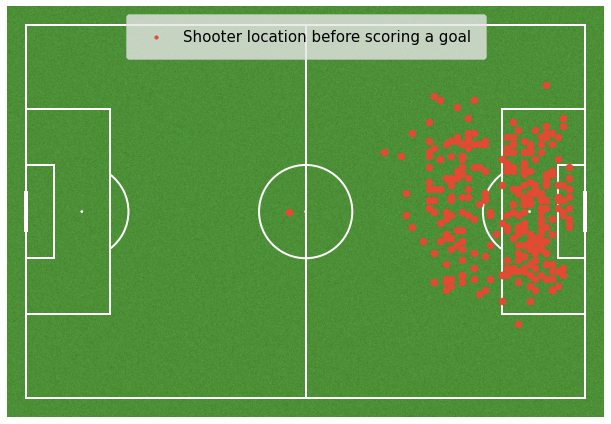

In [48]:
#pip install mplsoccer

from mplsoccer.pitch import Pitch
plt.style.use('ggplot')

pitch = Pitch(figsize=(10, 6),pitch_color='grass', line_color='white')
fig, ax = pitch.draw()
sc = pitch.scatter(goals["x"].array, goals["y"].array,s=200, label='Shooter location before scoring a goal', marker=".", ax=ax)
leg = ax.legend(borderpad=1, markerscale=0.5, labelspacing=1.5, loc='upper center', fontsize=15)


In [2]:
try:
    events.shape
except: # Si le fichier n'a pas encore été chargé
    events = pd.read_json("events_England.json")
finally:
    print(events.shape)

(643150, 12)


## Preparation des donnees pour construire le graphique

In [6]:
# On va rester fidèle à l'equipe Manchester City qui sera l'equipe X et 
# l'equipe Y sera Manchester United et on va prendre en compte les matchs
# disputés en 2017, soit avant le 31/12/2017. Pour cela on fait une
# jointure entre events, teams (pour l'id) et matches (pour la date)

merged = pd.merge(events, teams[teams["name"] == "Manchester United"], left_on = ['teamId'], right_on = ['wyId'])
merged = pd.merge(merged, matches[matches["dateutc"] < "2017-12-31"], left_on = ['matchId'], right_on = ['wyId'])

In [7]:
# Vérification qu'il n'y a bien qu'une seule équipe
merged["name"].value_counts()

Manchester United    18407
Name: name, dtype: int64

In [8]:
# Vérification qu'on est bien en 2017
merged["dateutc"].value_counts()

2017-10-21 14:00:00    1137
2017-12-26 15:00:00    1030
2017-08-26 16:30:00    1015
2017-11-18 17:30:00     960
2017-08-19 11:30:00     939
2017-09-30 14:00:00     922
2017-12-30 17:30:00     909
2017-12-13 20:00:00     909
2017-11-25 15:00:00     909
2017-11-05 16:30:00     894
2017-12-17 14:15:00     879
2017-09-09 16:30:00     867
2017-08-13 15:00:00     855
2017-09-17 15:00:00     806
2017-11-28 20:00:00     805
2017-10-14 11:30:00     804
2017-09-23 14:00:00     792
2017-10-28 11:30:00     788
2017-12-23 19:45:00     774
2017-12-10 16:30:00     752
2017-12-02 17:30:00     661
Name: dateutc, dtype: int64

In [9]:
# Nombre de matchs qui seront étudiés : une vingtaine
merged["matchId"].value_counts()

2499801    1137
2499914    1030
2499744    1015
2499836     960
2499736     939
2499784     922
2499884     909
2499924     909
2499843     909
2499819     894
2499898     879
2499756     867
2499724     855
2499764     806
2499853     805
2499793     804
2499775     792
2499816     788
2499903     774
2499873     752
2499860     661
Name: matchId, dtype: int64

In [10]:
list(merged)

['eventId',
 'subEventName',
 'tags',
 'playerId',
 'positions',
 'matchId',
 'eventName',
 'teamId',
 'matchPeriod',
 'eventSec',
 'subEventId',
 'id',
 'city',
 'name',
 'wyId_x',
 'officialName',
 'area',
 'type',
 'status',
 'roundId',
 'gameweek',
 'teamsData',
 'seasonId',
 'dateutc',
 'winner',
 'venue',
 'wyId_y',
 'label',
 'date',
 'referees',
 'duration',
 'competitionId']

In [14]:
# Pour cette partie, on va essayer de modéliser les passes réalisées au cours
# des matchs de l'équipe Manchester United en 2017

# Selection des passes
passes = merged[merged["eventName"] == "Pass"]

# Reorganisation de la colonne Positions
def firstPosition(tab):
    return str(tab[0]["x"])+str(tab[0]["y"])
        
passes["positions"] = passes["positions"].apply(firstPosition)

# Dans le fichier de donnees events.json, les positions sont comprises entre
# 0 et 100 que se soit pour la longueur ou la largeur du terrain. Tandis que
# pour mplsoccer la longueur est comprise entre 0 et 120 et la largeur entre 
# 0 et 80. On remet donc à la bonne echelle :
passes["x"] = 1.2 * pd.to_numeric(passes["positions"].str[:2])
passes["y"] = 0.8 * pd.to_numeric(passes["positions"].str[2:])

simple = passes[passes["subEventName"] == "Simple pass"]
high = passes[passes["subEventName"] == "High pass"]
head = passes[passes["subEventName"] == "Head pass"]

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

## Graphique

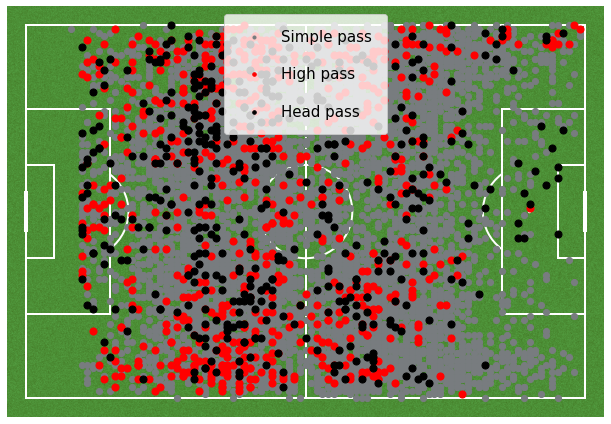

In [15]:
from mplsoccer.pitch import Pitch
pitch = Pitch(figsize=(10, 6),pitch_color='grass', line_color='white')
fig, ax = pitch.draw()

sc = pitch.scatter(simple["x"].array, simple["y"].array,s=150, color = "#787c7f", label='Simple pass', marker=".", ax=ax)
sc = pitch.scatter(high["x"].array, high["y"].array,s=200, color = "red", label='High pass', marker=".", ax=ax)
sc = pitch.scatter(head["x"].array, head["y"].array,s=200, color = "#000000", label='Head pass', marker=".", ax=ax)
leg = ax.legend(borderpad=1, markerscale=0.5, labelspacing=1.5, loc='upper center', fontsize=15)